In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np, pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from numpy import log
import math
from pmdarima.arima.utils import ndiffs
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")


In [2]:
#COLLECT ALL AVAILABLE DATA FOR Delhi, FROM ALL YEARS
Delhi_Data = pd.read_csv('Delhi_data.csv', index_col=0)

#KEEP ONLY POLLUTANTS COLUMNS AND TRANSFORM THE VALUES TO NUMERIC
cols=['pm25', 'pm10', 'no2', 'o3', 'so2']

Delhi_Data = Delhi_Data.loc[:, Delhi_Data.columns.intersection(cols)]
Delhi_Data = Delhi_Data.apply(pd.to_numeric, errors='coerce')

Delhi_Data = Delhi_Data.fillna(method='ffill')
Delhi_Data = Delhi_Data.fillna(method='bfill')

print("Delhi:\n" + str(Delhi_Data.isna().sum()))

Delhi:
no2     0
o3      0
pm10    0
pm25    0
so2     0
dtype: int64


# Auto-ARIMA

In [3]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Delhi_Data is stationary :")
for col in Delhi_Data.columns:
    result = adfuller(Delhi_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Delhi_Data is stationary :
p-value for no2 : 0.000491
p-value for o3 : 0.003891
p-value for pm10 : 0.000009
p-value for pm25 : 0.000003
p-value for so2 : 0.000114


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3530.649, Time=3.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3272.689, Time=0.46 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3285.519, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3299.024, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3274.685, Time=0.32 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3535.147, Time=3.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3478.557, Time=1.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.82 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3535.163, Time=3.15 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3530.207, Time=3.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3531.189, Time=3.24 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=-3530.502, Time=4.27 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=-3537.563, Time=3.67 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=-3537.994, Time=4.01 sec
 ARIMA(1,1,5)(0,0,0)[0] i

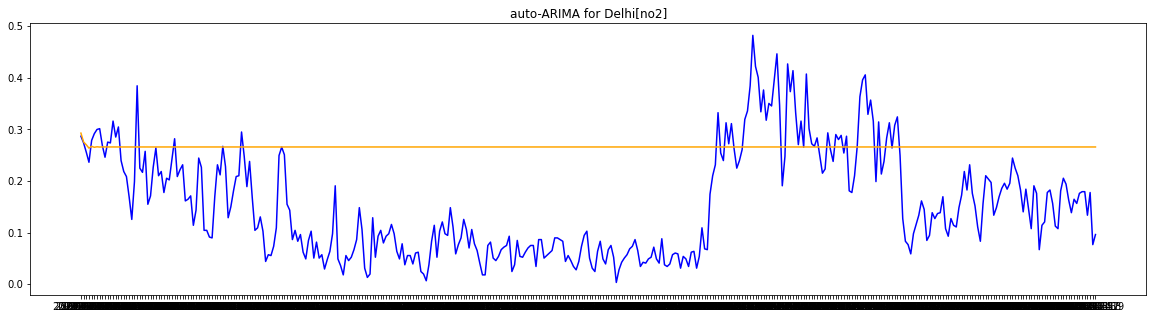

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3235.086, Time=2.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-2917.569, Time=0.51 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3021.413, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3106.311, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-2919.569, Time=0.27 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3237.032, Time=3.47 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3201.237, Time=1.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3239.020, Time=1.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3236.789, Time=0.94 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3083.554, Time=0.98 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3241.020, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3108.310, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3023.412, Time=0.29 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3239.032, Time=0.90 sec
 ARIMA(1,1,2)(0,0,0

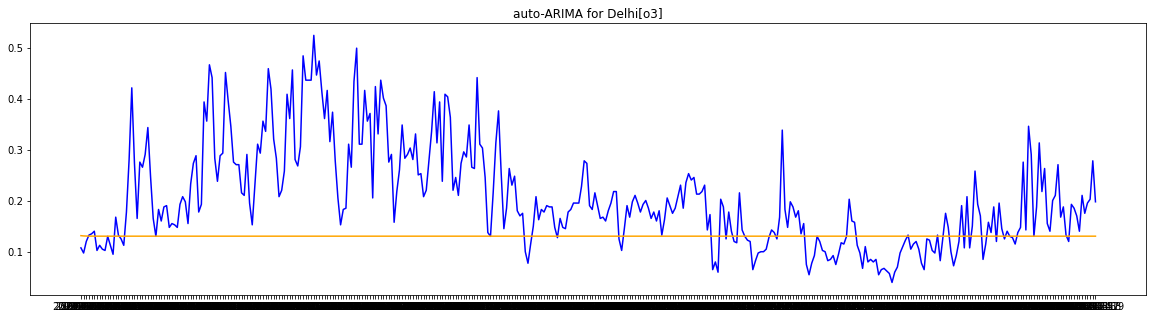

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-4402.527, Time=3.57 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-4169.859, Time=0.49 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-4194.225, Time=0.74 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-4211.504, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-4171.859, Time=0.34 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-4404.648, Time=2.78 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-4319.421, Time=1.68 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-4395.720, Time=1.62 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-4394.701, Time=3.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-4370.808, Time=2.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-4404.378, Time=2.93 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=4.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-4406.708, Time=0.99 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-4321.420, Time=0.57 sec
 ARIMA(1,1,1)(0,0,0)[0]  

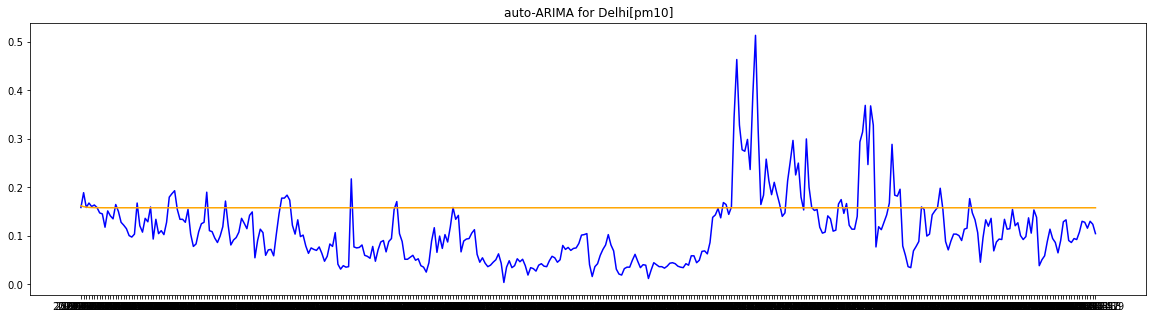

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3966.234, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3765.305, Time=0.63 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3796.473, Time=0.29 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3815.593, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3767.301, Time=0.16 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3970.350, Time=2.04 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3899.339, Time=1.89 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=2.11 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3969.342, Time=3.14 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=-3959.319, Time=2.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3935.588, Time=2.81 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3968.934, Time=3.66 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-3972.328, Time=1.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-3901.324, Time=1.13 sec
 ARIMA(1,1,1)(0,0,0)[0]  

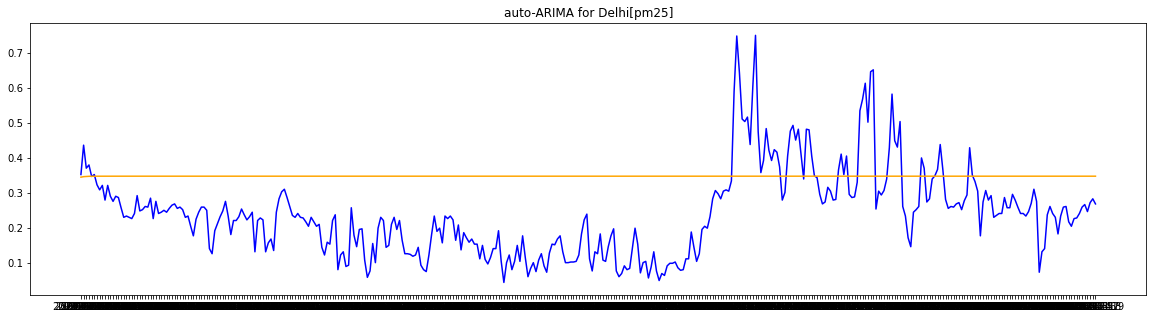

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3765.108, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3503.377, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3591.055, Time=0.58 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3653.231, Time=1.29 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3505.374, Time=0.26 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3766.843, Time=2.71 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-3732.979, Time=1.79 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3768.417, Time=2.56 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3766.785, Time=2.81 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-3649.349, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-3770.410, Time=1.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-3655.229, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-3593.053, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=-3768.779, Time=0.75 sec
 ARIMA(1,1,2)(0,0,0

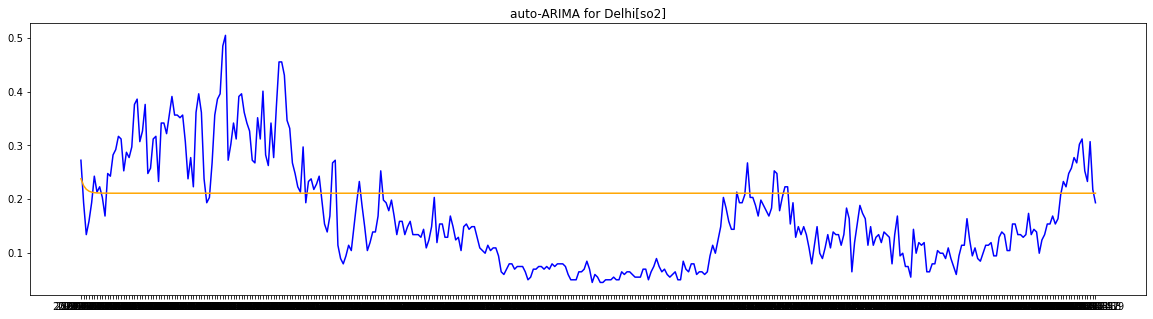

In [4]:
def auto_arima_forecast(city_data, city):
    training_percentage = 0.80
    #THERE ARE FIVE POLLUTANTS, THEREFORE FIVE TIME SERIES TO PREDICT WITH ARIMA
    for col in city_data:
        data = city_data[col]

        #SPLIT DATA INTO TRAIN AND TEST PORTIONS
        train = data[:int(training_percentage*(len(data)))]
        test = data[int(training_percentage*(len(data))):]

        #AUTO-ARIMA MODEL (data is not seasonal as seen from the graph above)
            
        model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True, seasonal=False)
        
        #PREDICT AS MANY PERIODS AS THE 'TEST' DATASET'S LENGTH
        forecast = model.predict(n_periods=len(test))
        forecast = pd.DataFrame(forecast,index = test.index,columns=['Forecast'])
        
        #CALCULATE ERROR METRICS FOR EACH TIME SERIES
        mse = mean_squared_error(test, forecast)
        rmse = math.sqrt(mean_squared_error(test, forecast))
        mae = mean_absolute_error(test, forecast)

        print("auto-ARIMA MSE for Delhi[" + str(col) + "]:" + str(mse))
        print("auto-ARIMA RMSE for Delhi[" + str(col) + "]:" + str(rmse))
        print("auto-ARIMA MAE for Delhi[" + str(col) + "]:" + str(mae))
        
        title = "auto-ARIMA for " + city + "[" + col +"]"
        # Plot the predictions for testation set
        plt.figure(figsize=(20, 5))
        plt.title(title)
        plt.plot(test, label='Actual Data', color='blue')
        plt.plot(forecast, label='Predicted Data', color='orange')
        plt.show()

auto_arima_forecast(Delhi_Data, "Delhi")

# Finding optimal ARIMA parameters manually

In [5]:
#Check data for stationarity to apply the ARIMA model.

#The null hypothesis is that the time series is non-stationary.
#Using the Augmented Dickey Fuller test (adfuller()) we can check for stationarity.
#If p-value < significance level(0.05), the we reject the null hypothesis.
#Otherwise, the time series is non-stationary and needs differencing.

print("Check if Delhi_Data is stationary :")
for col in Delhi_Data.columns:
    result = adfuller(Delhi_Data[col])
    print('p-value for ' + col + ' : %f' % result[1])

Check if Delhi_Data is stationary :
p-value for no2 : 0.000491
p-value for o3 : 0.003891
p-value for pm10 : 0.000009
p-value for pm25 : 0.000003
p-value for so2 : 0.000114


In [6]:
#Order of differencing (d) for 'no2'
print(ndiffs(Delhi_Data['no2'], test='adf'))

#Order of differencing (d) for 'o3'
print(ndiffs(Delhi_Data['o3'], test='adf'))

#Order of differencing (d) for 'pm10'
print(ndiffs(Delhi_Data['pm10'], test='adf'))

#Order of differencing (d) for 'pm25'
print(ndiffs(Delhi_Data['pm25'], test='adf'))

#Order of differencing (d) for 'so2'
print(ndiffs(Delhi_Data['so2'], test='adf'))

0
0
0
0
0


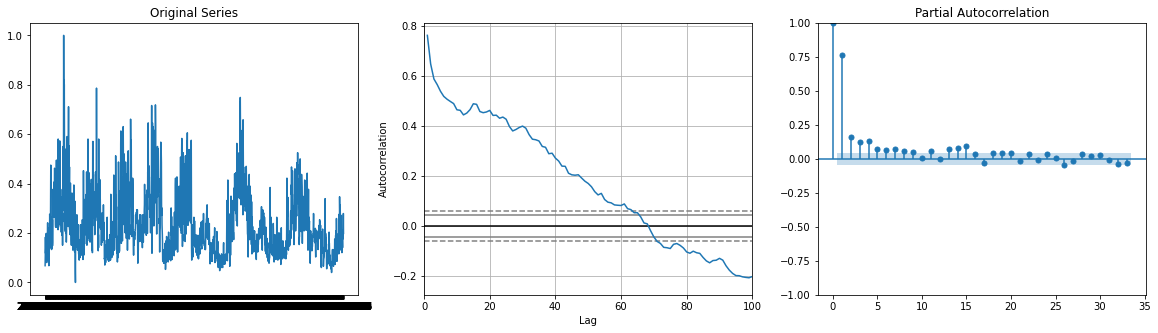

In [7]:
#Ο3
#After checking the results above, the time series that need differencing is Delhi_Data['o3'],
#as p-value for o3 : 0.229985 > 0.05
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Delhi_Data['o3']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Delhi_Data['o3'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Delhi_Data['o3'], ax=axes[2])

plt.show()

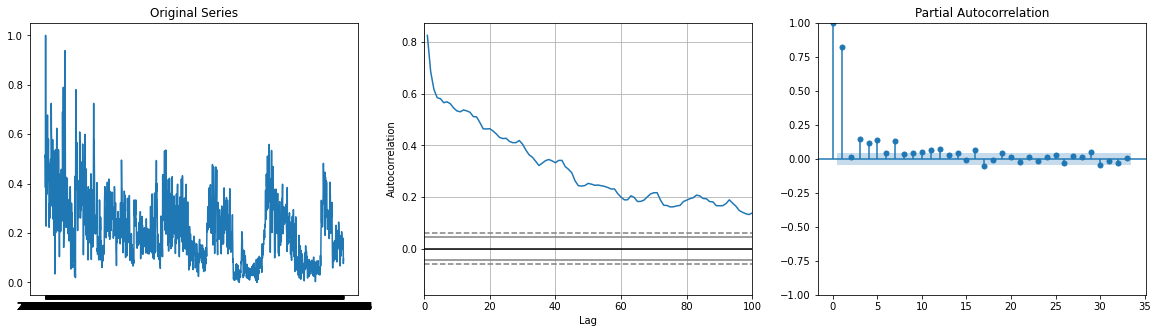

In [8]:
#NO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Delhi_Data['no2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Delhi_Data['no2'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Delhi_Data['no2'], ax=axes[2])

plt.show()

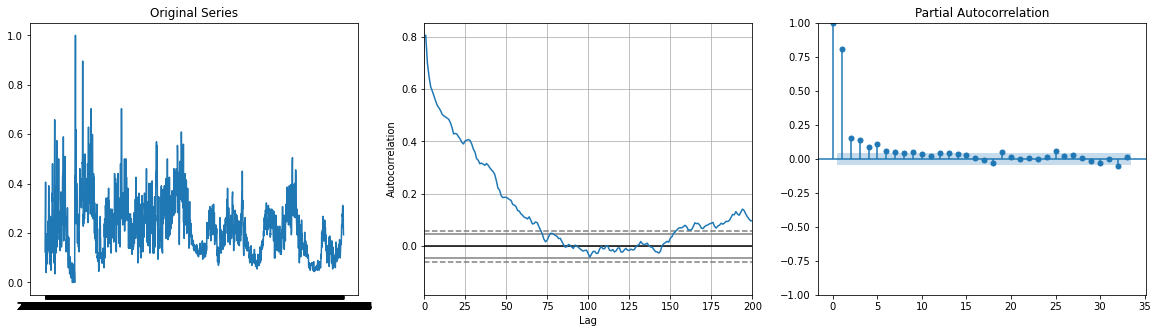

In [9]:
#SO2
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Delhi_Data['so2']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Delhi_Data['so2'], ax=axes[1])
pl.set_xlim([0,200])
plot_pacf(Delhi_Data['so2'], ax=axes[2])

plt.show()

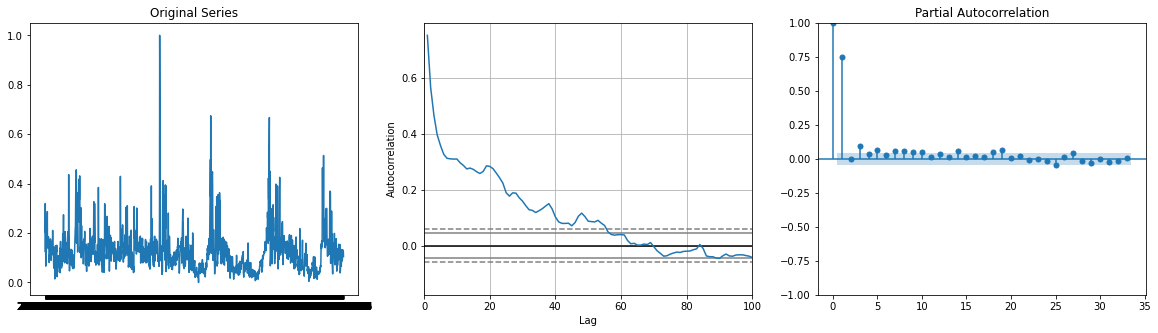

In [10]:
#PM10
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Delhi_Data['pm10']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Delhi_Data['pm10'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Delhi_Data['pm10'], ax=axes[2])

plt.show()

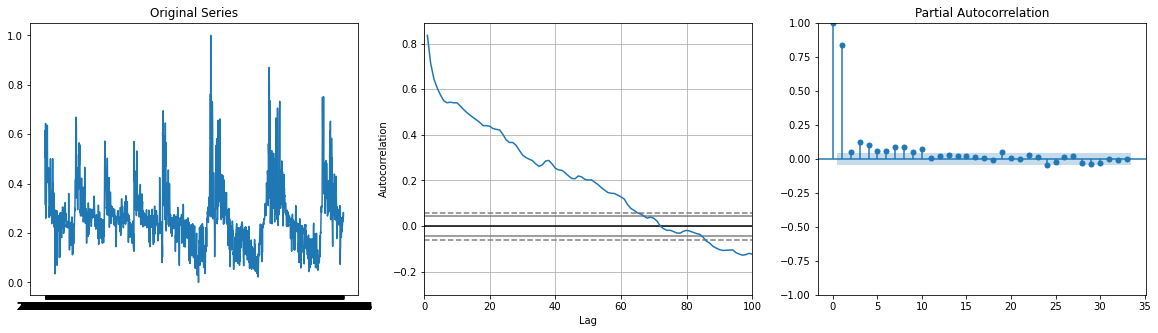

In [11]:
#PM2.5
plt.rcParams.update({'figure.figsize':(20,5)})

# Original Series
fig, axes = plt.subplots(1, 3)
axes[0].plot(Delhi_Data['pm25']); axes[0].set_title('Original Series')
pl = autocorrelation_plot(Delhi_Data['pm25'], ax=axes[1])
pl.set_xlim([0,100])
plot_pacf(Delhi_Data['pm25'], ax=axes[2])

plt.show()

### Delhi daily predictions

In [12]:
#params = (p,d,q)

def manual_ARIMA(data, params):
    
    #SPLIT DATA TO TRAIN AND TEST PORTIONS
    train_size = int(len(data) * 0.8)
    train, test = data[0:train_size], data[train_size:]
    
    #PREDICTIONS WILL BE STORED IN A LIST
    predictions = list()
    
    #'fitted_values' IS GOING TO BE USED AS NEW TRAINING DATA EACH TIME. EVERY PREDICTION IS GOING TO BE
    #ADDED IN THE TRAIN PORTION FOR THE NEXT ITERATION FOR BETTER ACCURACY
    fitted_values = [x for x in train]

    for t in range(len(test)):
        #MODEL
        model = ARIMA(fitted_values, order=params)
        model_fit = model.fit()
        #print(model_fit.summary())
        
        #PREDICT TEST VALUES
        pred = model_fit.forecast()[0]
        predictions.append(pred)
        fitted_values.append(test.iloc[t])

    #error = math.sqrt(mean_squared_error(test, predictions))
    return predictions, test

In [13]:
import itertools
import warnings
warnings.filterwarnings('ignore')
# Grid Search

def arima_grid_search(df, pollutant):

    p = q = range(5,11)
    d = [0]
    pdq = list(itertools.product(p,d,q)) # gets all possible combinations of p, d, and q 
    combs = {}
    aics = []
    # Grid Search Continued
    for combination in pdq:
        model = ARIMA(df, order=combination)
        model = model.fit()
        #print(model.summary())
        combs.update({model.aic : [combination]})
        aics.append(model.aic)
            
    best_aic = min(aics)
    
    print('best AIC is: ', best_aic)
    print ('ARIMA parameters: ', '\n', 'p: ', combs[best_aic][0][0], '\n', 'd: 0', '\n', 'q: ',combs[best_aic][0][2])
    
    forecast, test = manual_ARIMA(df, (combs[best_aic][0][0], 0, combs[best_aic][0][2]))
    forecast = pd.Series(forecast)
    forecast.index = test.index
    
    print("ARIMA MSE for Delhi " + str(pollutant)+" " + str(mean_squared_error(test, forecast)))
    print("ARIMA RMSE for Delhi " + str(pollutant)+" "  + str(math.sqrt(mean_squared_error(test, forecast))))
    print("ARIMA MAE for Delhi "+ str(pollutant)+" "  + str(mean_absolute_error(test, forecast)))
    
    title = "ARIMA for Delhi" + "[" + str(pollutant) +"]"
    plt.figure(figsize=(20, 5))
    plt.title(title)
    plt.plot(test, label='Actual Data', color='blue')
    plt.plot(forecast, label='Predicted Data', color='orange')
    plt.show()

    return forecast, test

best AIC is:  -4265.903356115372
ARIMA parameters:  
 p:  8 
 d: 0 
 q:  8
ARIMA MSE for Delhi o3 0.0034347122417363496
ARIMA RMSE for Delhi o3 0.05860641809338248
ARIMA MAE for Delhi o3 0.042613152834632184


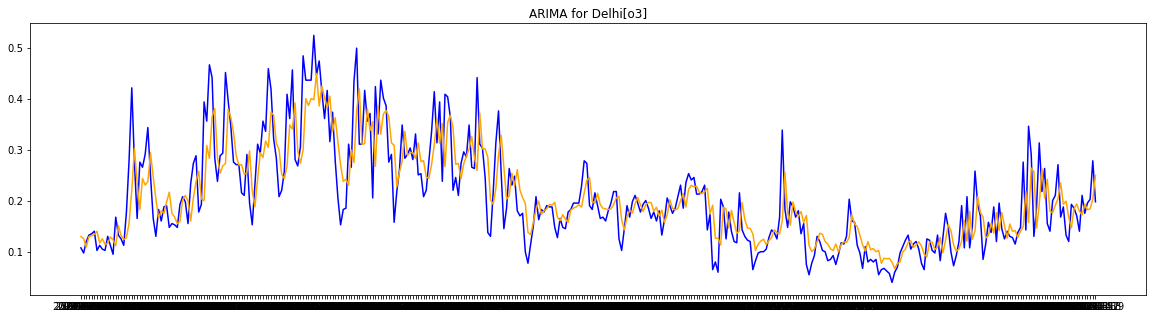

best AIC is:  -4705.979719119957
ARIMA parameters:  
 p:  8 
 d: 0 
 q:  5
ARIMA MSE for Delhi no2 0.0020087501340977066
ARIMA RMSE for Delhi no2 0.04481908225407685
ARIMA MAE for Delhi no2 0.03327920314861849


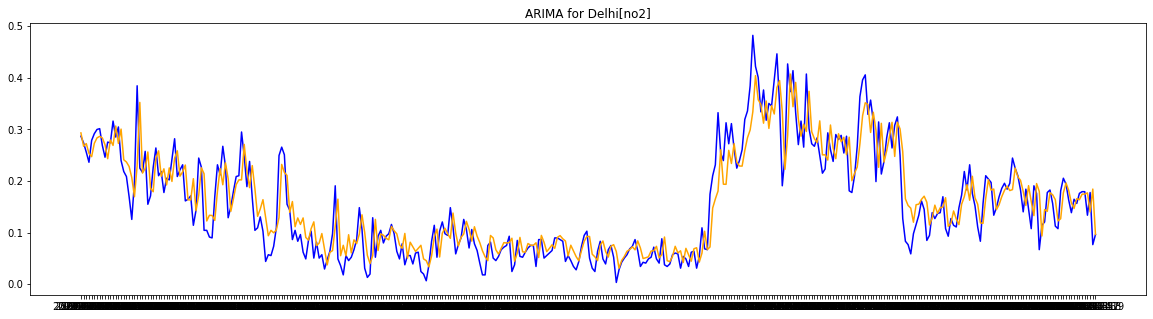

best AIC is:  -5014.570398221659
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi so2 0.0013927012404780512
ARIMA RMSE for Delhi so2 0.03731891263793804
ARIMA MAE for Delhi so2 0.027599089966522307


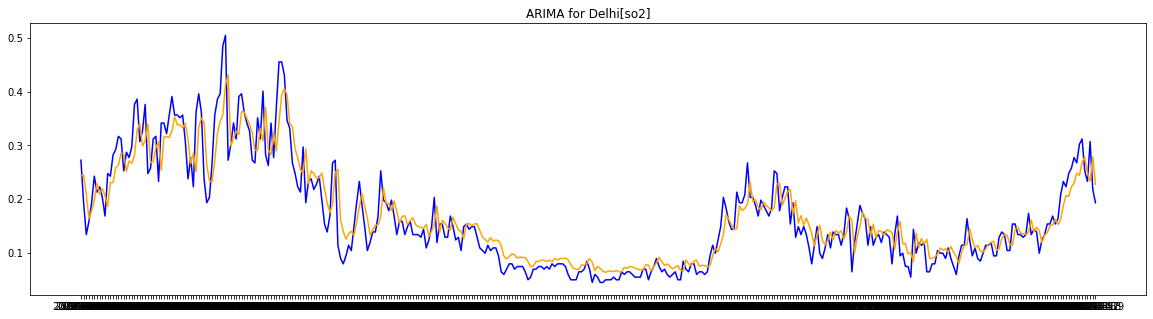

best AIC is:  -5718.67125617452
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi pm10 0.0016347290251984435
ARIMA RMSE for Delhi pm10 0.04043178236484812
ARIMA MAE for Delhi pm10 0.02618099771371461


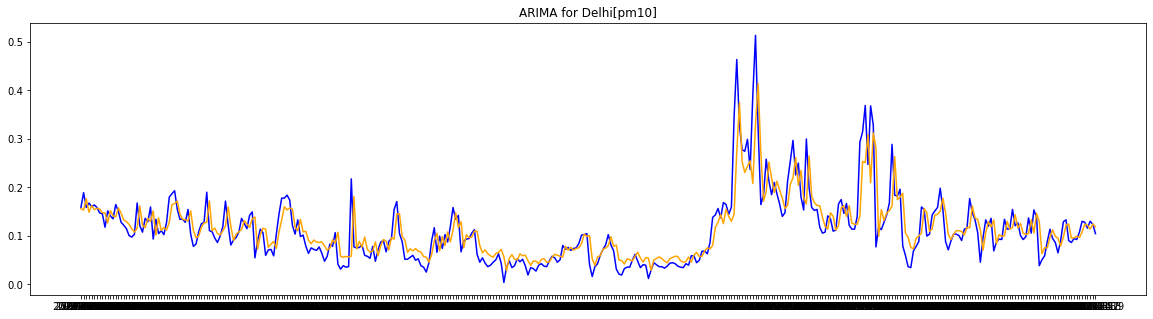

best AIC is:  -5064.052098660052
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi pm25 0.003332326905197773
ARIMA RMSE for Delhi pm25 0.05772631033764217
ARIMA MAE for Delhi pm25 0.03903815540880355


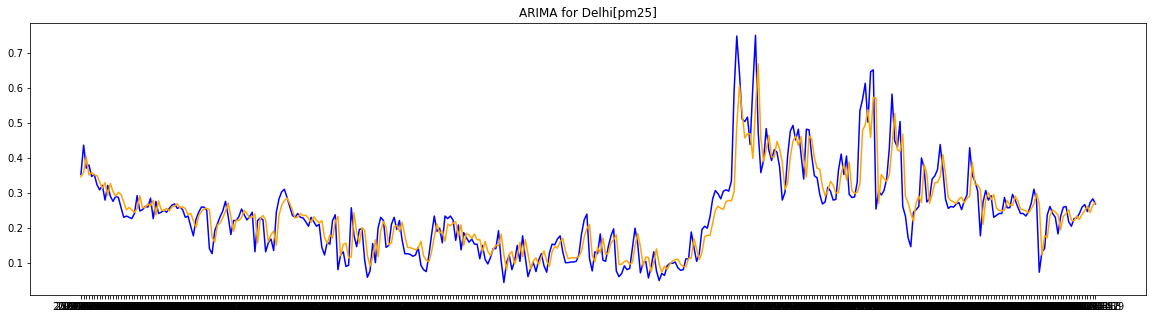

In [15]:
#O3
predictions_o3, test_o3 = arima_grid_search(Delhi_Data['o3'], 'o3')
#NO2
predictions_no2, test_no2 = arima_grid_search(Delhi_Data['no2'], 'no2')
#SO2
predictions_so2, test_so2 = arima_grid_search(Delhi_Data['so2'], 'so2')
#PM10
predictions_pm10, test_pm10 = arima_grid_search(Delhi_Data['pm10'], 'pm10')
#PM25
predictions_pm25, test_pm25 = arima_grid_search(Delhi_Data['pm25'], 'pm25')

## Repeat process for less data

In [16]:
import pandas as pd
Athens_Data = pd.read_csv('Athens_Data.csv', index_col=0)

data_to_drop = len(Delhi_Data) - len(Athens_Data)
Delhi_less_data = Delhi_Data.iloc[data_to_drop: , :]
len(Delhi_less_data)

839

best AIC is:  -2344.844250137517
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi o3 0.0022338523109056278
ARIMA RMSE for Delhi o3 0.04726364682190349
ARIMA MAE for Delhi o3 0.03373685139573887


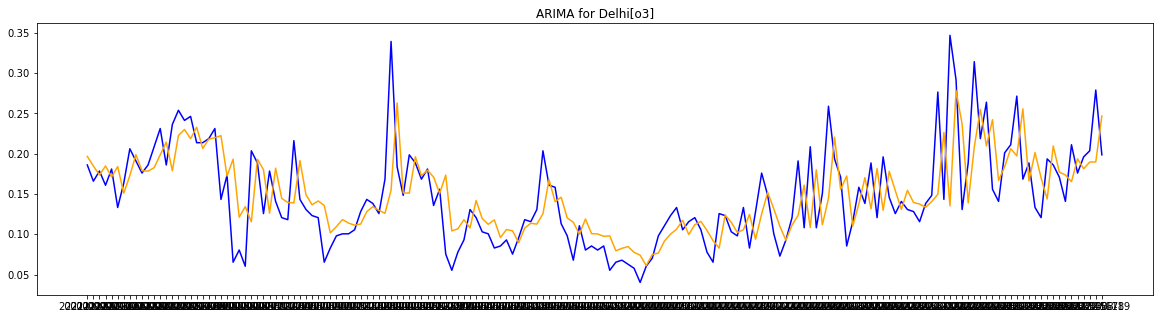

best AIC is:  -2751.6417149992344
ARIMA parameters:  
 p:  7 
 d: 0 
 q:  8
ARIMA MSE for Delhi no2 0.0025406174885931015
ARIMA RMSE for Delhi no2 0.05040453837297889
ARIMA MAE for Delhi no2 0.038639475447503645


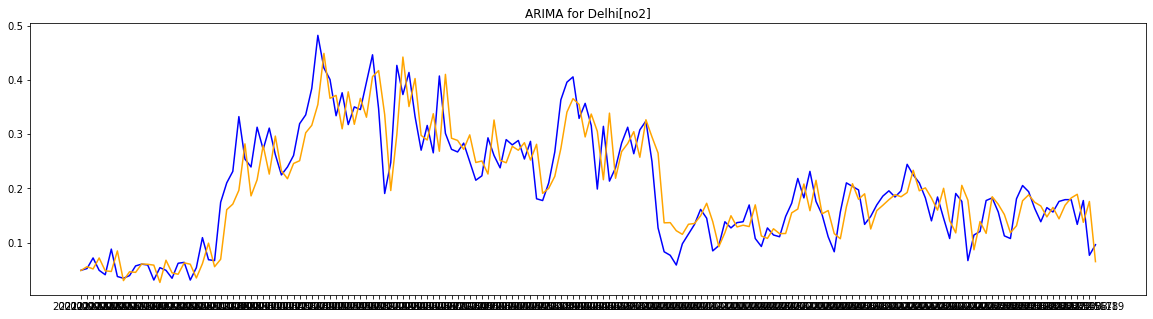

best AIC is:  -3193.2263947502956
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi so2 0.0008572235781595856
ARIMA RMSE for Delhi so2 0.029278380729807884
ARIMA MAE for Delhi so2 0.022064766906917794


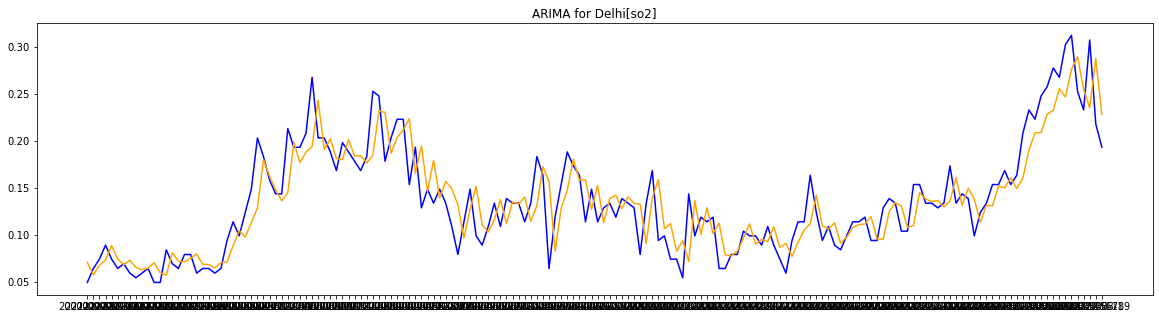

best AIC is:  -2716.0451153079007
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi pm10 0.002836764869214336
ARIMA RMSE for Delhi pm10 0.05326128865521689
ARIMA MAE for Delhi pm10 0.0343285030681399


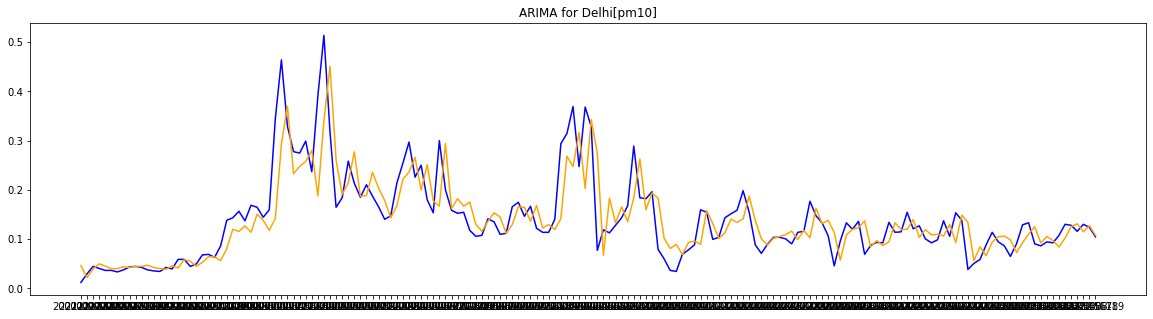

best AIC is:  -2143.758522959128
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi pm25 0.005376409690412391
ARIMA RMSE for Delhi pm25 0.07332400487161343
ARIMA MAE for Delhi pm25 0.049227800584933756


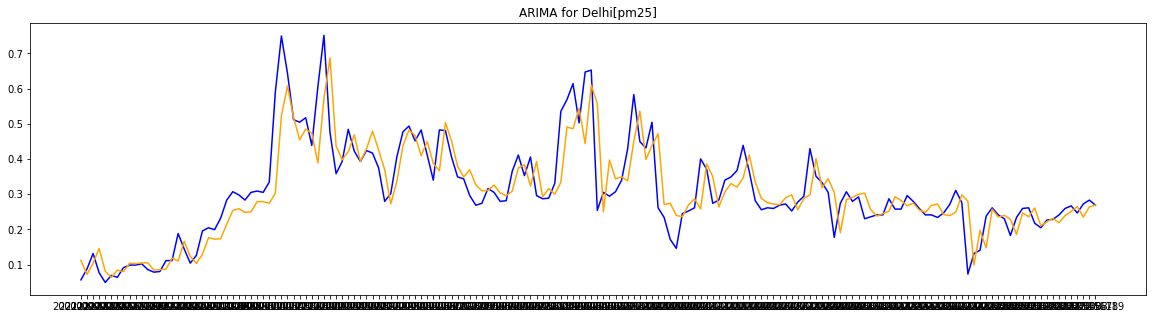

(2021-09-11    0.111930
 2021-09-12    0.072202
 2021-09-13    0.104715
 2021-09-14    0.145858
 2021-09-15    0.081436
                 ...   
 2022-03-15    0.251186
 2022-03-16    0.264933
 2022-03-17    0.235018
 2022-03-18    0.264160
 2022-03-19    0.269070
 Length: 168, dtype: float64,
 2021-09-11    0.056673
 2021-09-12    0.087751
 2021-09-13    0.131627
 2021-09-14    0.076782
 2021-09-15    0.049360
                 ...   
 2022-03-15    0.266910
 2022-03-16    0.246801
 2022-03-17    0.272395
 2022-03-18    0.283364
 2022-03-19    0.268739
 Name: pm25, Length: 168, dtype: float64)

In [17]:
#O3
arima_grid_search(Delhi_less_data['o3'], 'o3')
#NO2
arima_grid_search(Delhi_less_data['no2'], 'no2')
#SO2
arima_grid_search(Delhi_less_data['so2'], 'so2')
#PM10
arima_grid_search(Delhi_less_data['pm10'], 'pm10')
#PM25
arima_grid_search(Delhi_less_data['pm25'], 'pm25')

### Delhi weekly predictions

best AIC is:  -1113.8421795767754
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi o3 0.002371492078909634
ARIMA RMSE for Delhi o3 0.04869796791355502
ARIMA MAE for Delhi o3 0.03591339949667314


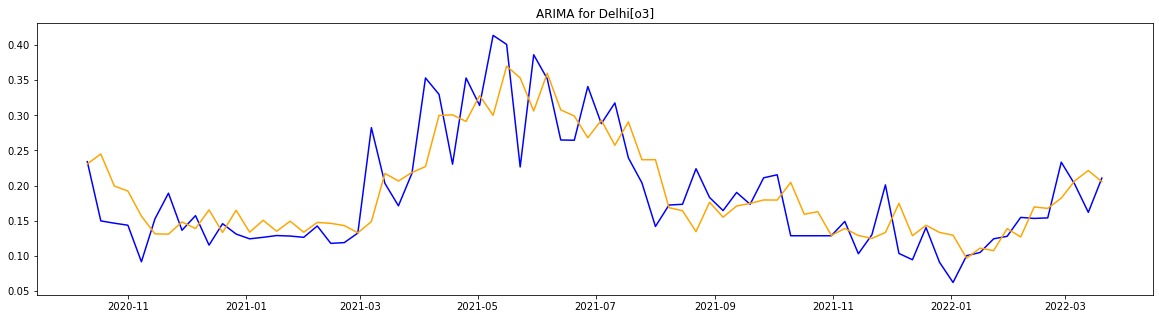

best AIC is:  -1067.449552163807
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  6
ARIMA MSE for Delhi no2 0.003674391359789032
ARIMA RMSE for Delhi no2 0.06061675807719374
ARIMA MAE for Delhi no2 0.04562700864294085


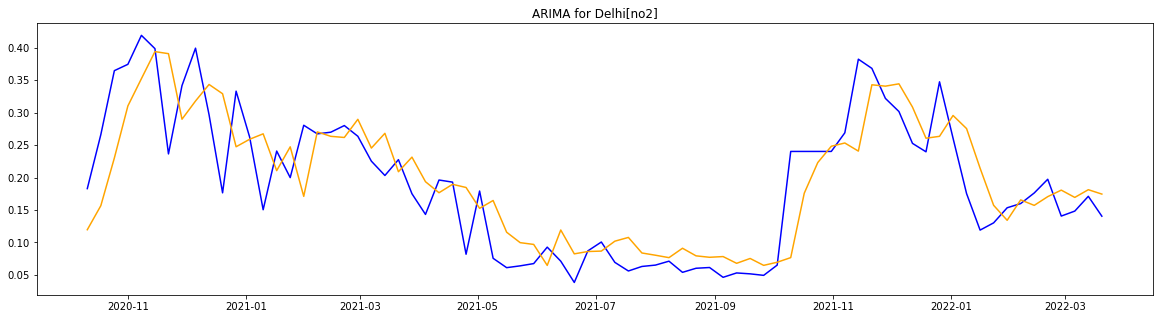

best AIC is:  -1102.7478672295715
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi so2 0.0014408074732574169
ARIMA RMSE for Delhi so2 0.03795796982528724
ARIMA MAE for Delhi so2 0.03011153835007931


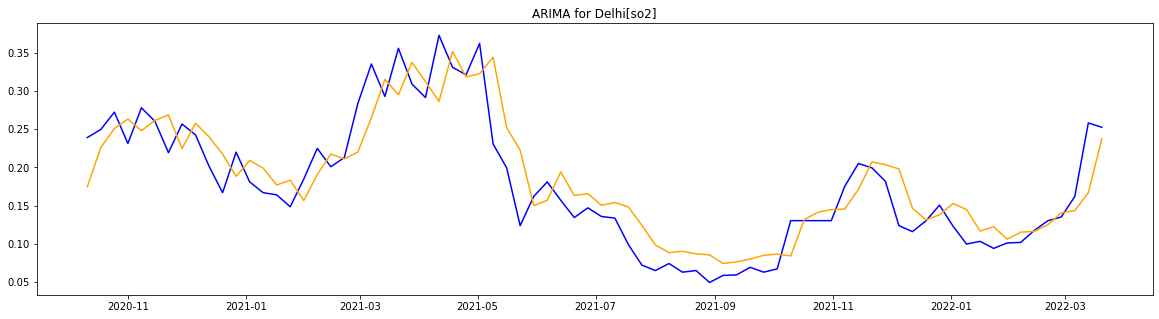

best AIC is:  -1193.348908509923
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi pm10 0.0029744886500942657
ARIMA RMSE for Delhi pm10 0.054538872834834655
ARIMA MAE for Delhi pm10 0.0389368967264994


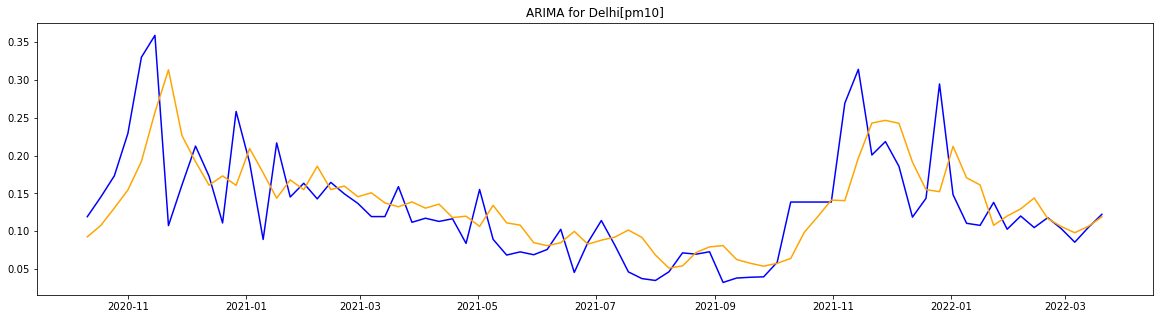

best AIC is:  -1032.8067397922578
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  5
ARIMA MSE for Delhi pm25 0.005815167288657919
ARIMA RMSE for Delhi pm25 0.07625724417167144
ARIMA MAE for Delhi pm25 0.05637230630839339


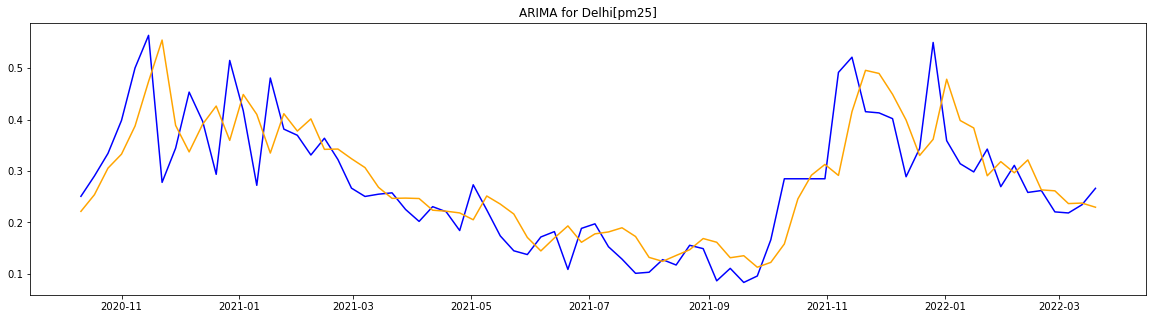

(2020-10-11    0.221437
 2020-10-18    0.253942
 2020-10-25    0.305574
 2020-11-01    0.332810
 2020-11-08    0.387501
                 ...   
 2022-02-20    0.263269
 2022-02-27    0.261419
 2022-03-06    0.236602
 2022-03-13    0.237575
 2022-03-20    0.229494
 Freq: W-SUN, Length: 76, dtype: float64,
 2020-10-11    0.250718
 2020-10-18    0.290415
 2020-10-25    0.334291
 2020-11-01    0.398537
 2020-11-08    0.500653
                 ...   
 2022-02-20    0.261948
 2022-02-27    0.220423
 2022-03-06    0.218334
 2022-03-13    0.234265
 2022-03-20    0.266301
 Freq: W-SUN, Name: pm25, Length: 76, dtype: float64)

In [18]:
Delhi_Data.index = pd.to_datetime(Delhi_Data.index)
Delhi_weekly = Delhi_Data.resample("1w").mean().bfill()

#O3
arima_grid_search(Delhi_weekly['o3'], 'o3')
#NO2
arima_grid_search(Delhi_weekly['no2'], 'no2')
#SO2
arima_grid_search(Delhi_weekly['so2'], 'so2')
#PM10
arima_grid_search(Delhi_weekly['pm10'], 'pm10')
#PM25
arima_grid_search(Delhi_weekly['pm25'], 'pm25')

### Delhi monthly predictions

best AIC is:  -286.10527279291716
ARIMA parameters:  
 p:  7 
 d: 0 
 q:  7
ARIMA MSE for Delhi o3 0.001322531034873597
ARIMA RMSE for Delhi o3 0.036366619788943774
ARIMA MAE for Delhi o3 0.030230026268832606


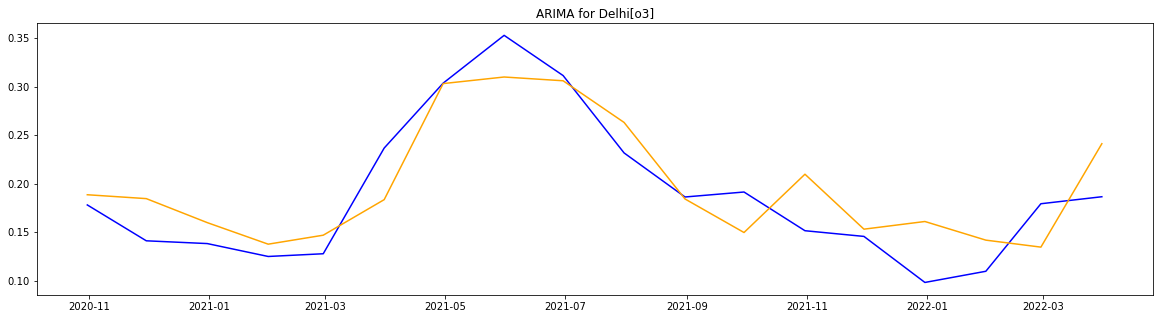

best AIC is:  -217.12747458862208
ARIMA parameters:  
 p:  8 
 d: 0 
 q:  10
ARIMA MSE for Delhi no2 0.002585269909444453
ARIMA RMSE for Delhi no2 0.05084554955396247
ARIMA MAE for Delhi no2 0.043150097273891914


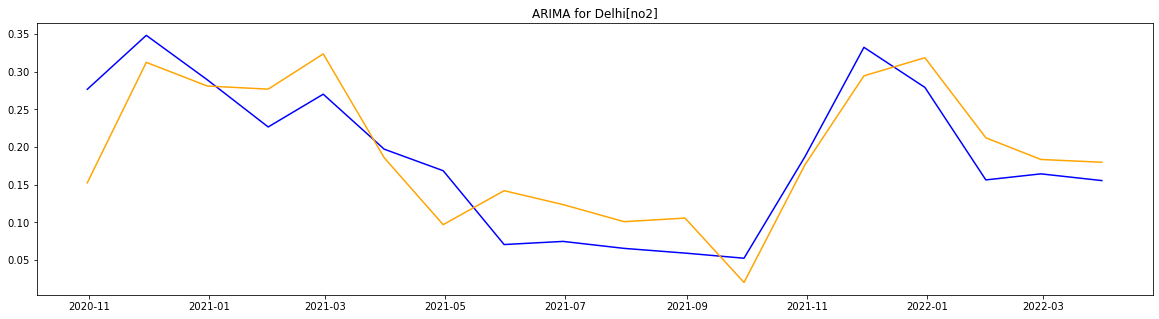

best AIC is:  -219.6140270532751
ARIMA parameters:  
 p:  10 
 d: 0 
 q:  7
ARIMA MSE for Delhi so2 0.003651114878711541
ARIMA RMSE for Delhi so2 0.06042445596537499
ARIMA MAE for Delhi so2 0.04934706732602548


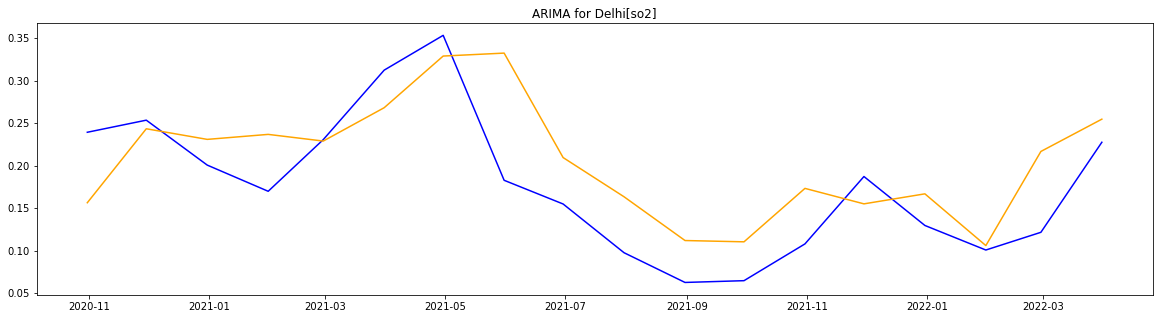

best AIC is:  -242.5656279769894
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi pm10 0.0017488255138212252
ARIMA RMSE for Delhi pm10 0.04181896117577797
ARIMA MAE for Delhi pm10 0.03496645872258777


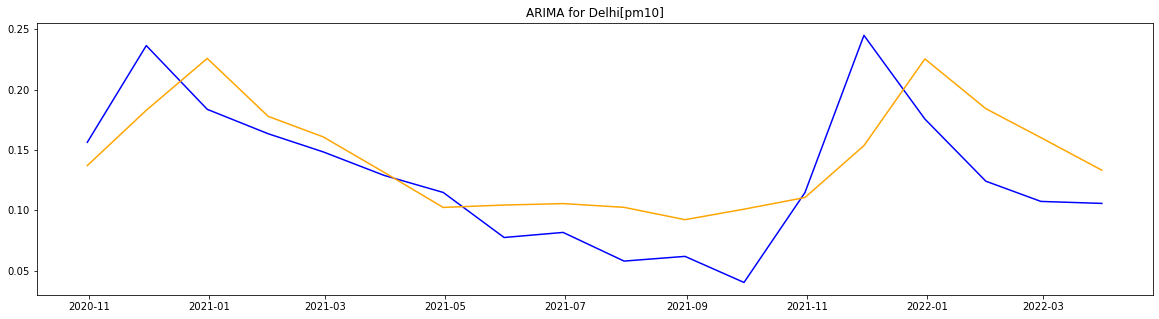

best AIC is:  -187.4479057214672
ARIMA parameters:  
 p:  5 
 d: 0 
 q:  7
ARIMA MSE for Delhi pm25 0.003786938612058776
ARIMA RMSE for Delhi pm25 0.06153810699118698
ARIMA MAE for Delhi pm25 0.049105201650266564


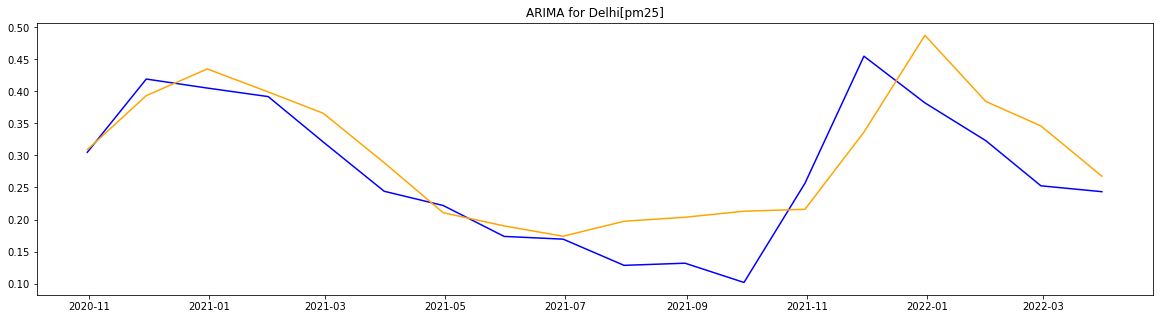

(2020-10-31    0.308996
 2020-11-30    0.393391
 2020-12-31    0.434964
 2021-01-31    0.399155
 2021-02-28    0.365881
 2021-03-31    0.288700
 2021-04-30    0.210595
 2021-05-31    0.190047
 2021-06-30    0.173873
 2021-07-31    0.197271
 2021-08-31    0.203524
 2021-09-30    0.212945
 2021-10-31    0.215947
 2021-11-30    0.336357
 2021-12-31    0.487459
 2022-01-31    0.384245
 2022-02-28    0.346087
 2022-03-31    0.267631
 Freq: M, dtype: float64,
 2020-10-31    0.304889
 2020-11-30    0.419257
 2020-12-31    0.405201
 2021-01-31    0.391874
 2021-02-28    0.320972
 2021-03-31    0.244088
 2021-04-30    0.221877
 2021-05-31    0.173616
 2021-06-30    0.169348
 2021-07-31    0.128443
 2021-08-31    0.131804
 2021-09-30    0.101767
 2021-10-31    0.256551
 2021-11-30    0.454906
 2021-12-31    0.382084
 2022-01-31    0.323052
 2022-02-28    0.252612
 2022-03-31    0.243433
 Freq: M, Name: pm25, dtype: float64)

In [19]:
Delhi_Data.index = pd.to_datetime(Delhi_Data.index)
Delhi_monthly = Delhi_Data.resample("1m").mean().bfill()

#O3
arima_grid_search(Delhi_monthly['o3'], 'o3')
#NO2
arima_grid_search(Delhi_monthly['no2'], 'no2')
#SO2
arima_grid_search(Delhi_monthly['so2'], 'so2')
#PM10
arima_grid_search(Delhi_monthly['pm10'], 'pm10')
#PM25
arima_grid_search(Delhi_monthly['pm25'], 'pm25')

### Comparison of monthly predicted and actual data

In [20]:
Delhi_Data.index = pd.to_datetime(Delhi_Data.index)

In [21]:
Delhi_monthly = Delhi_Data.resample("1m").mean().bfill()

In [22]:
predictions_o3.index = pd.to_datetime(predictions_o3.index)
predictions_no2.index = pd.to_datetime(predictions_no2.index)
predictions_so2.index = pd.to_datetime(predictions_so2.index)
predictions_pm10.index = pd.to_datetime(predictions_pm10.index)
predictions_pm25.index = pd.to_datetime(predictions_pm25.index)

test_o3.index = pd.to_datetime(test_o3.index)
test_no2.index = pd.to_datetime(test_no2.index)
test_so2.index = pd.to_datetime(test_so2.index)
test_pm10.index = pd.to_datetime(test_pm10.index)
test_pm25.index = pd.to_datetime(test_pm25.index)

In [23]:
preds_monthly = [predictions_o3.resample("1m").mean().bfill(), predictions_no2.resample("1m").mean().bfill(), 
                 predictions_so2.resample("1m").mean().bfill(), predictions_pm10.resample("1m").mean().bfill(),
                 predictions_pm25.resample("1m").mean().bfill()]
test_monthly = [test_o3.resample("1m").mean().bfill(), test_no2.resample("1m").mean().bfill(), test_so2.resample("1m").mean().bfill(),
                test_pm10.resample("1m").mean().bfill(), test_pm25.resample("1m").mean().bfill()]

In [24]:
print("O3\n")
print("ARIMA MSE for Delhi[O3]:" + str(mean_squared_error(test_monthly[0], preds_monthly[0])))
print("ARIMA RMSE for Delhi[O3]:" + str(math.sqrt(mean_squared_error(test_monthly[0], preds_monthly[0]))))
print("ARIMA MAE for Delhi[O3]:" + str(mean_absolute_error(test_monthly[0], preds_monthly[0])))
print("\n")

print("NO2\n")
print("ARIMA MSE for Delhi[NO2]:" + str(mean_squared_error(test_monthly[1], preds_monthly[1])))
print("ARIMA RMSE for Delhi[NO2]:" + str(math.sqrt(mean_squared_error(test_monthly[1], preds_monthly[1]))))
print("ARIMA MAE for Delhi[NO2]:" + str(mean_absolute_error(test_monthly[1], preds_monthly[1])))
print("\n")

print("SO2\n")
print("ARIMA MSE for Delhi[SO2]:" + str(mean_squared_error(test_monthly[2], preds_monthly[2])))
print("ARIMA RMSE for Delhi[SO2]:" + str(math.sqrt(mean_squared_error(test_monthly[2], preds_monthly[2]))))
print("ARIMA MAE for Delhi[SO2]:" + str(mean_absolute_error(test_monthly[2], preds_monthly[2])))
print("\n")

print("PM10\n")
print("ARIMA MSE for Delhi[PM10]:" + str(mean_squared_error(test_monthly[3], preds_monthly[3])))
print("ARIMA RMSE for Delhi[PM10]:" + str(math.sqrt(mean_squared_error(test_monthly[3], preds_monthly[3]))))
print("ARIMA MAE for Delhi[PM10]:" + str(mean_absolute_error(test_monthly[3], preds_monthly[3])))
print("\n")

print("PM25\n")
print("ARIMA MSE for Delhi[PM25]:" + str(mean_squared_error(test_monthly[4], preds_monthly[4])))
print("ARIMA RMSE for Delhi[PM25]:" + str(math.sqrt(mean_squared_error(test_monthly[4], preds_monthly[4]))))
print("ARIMA MAE for Delhi[PM25]:" + str(mean_absolute_error(test_monthly[4], preds_monthly[4])))

O3

ARIMA MSE for Delhi[O3]:0.00015204100606537127
ARIMA RMSE for Delhi[O3]:0.012330490909342226
ARIMA MAE for Delhi[O3]:0.009779242290008835


NO2

ARIMA MSE for Delhi[NO2]:0.00030470626828567934
ARIMA RMSE for Delhi[NO2]:0.01745583765637385
ARIMA MAE for Delhi[NO2]:0.012721370790322923


SO2

ARIMA MSE for Delhi[SO2]:0.00018380691475068653
ARIMA RMSE for Delhi[SO2]:0.013557540881394624
ARIMA MAE for Delhi[SO2]:0.012073291969546412


PM10

ARIMA MSE for Delhi[PM10]:0.0001090805920965269
ARIMA RMSE for Delhi[PM10]:0.010444165457159652
ARIMA MAE for Delhi[PM10]:0.007873753680759366


PM25

ARIMA MSE for Delhi[PM25]:0.0002816654656521295
ARIMA RMSE for Delhi[PM25]:0.016782892052686554
ARIMA MAE for Delhi[PM25]:0.011931784396522408
